# Forecasting Energy Required

### Linear regression, logistic regression, matplotlib.


## Part 1 - Regression


### Data:

The dataset was created by Angeliki Xifara ( Civil/Structural Engineer) and was processed by Athanasios Tsanas, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

__Data Description__:

The dataset contains eight attributes of a building (or features, denoted by X1...X8) and response being the heating load on the building, y1. 

* X1	Relative Compactness 
* X2	Surface Area 
* X3	Wall Area 
*  X4	Roof Area 
*  X5	Overall Height 
* X6	Orientation 
*  X7	Glazing Area 
*  X8	Glazing Area Distribution 
*  y1	Heating Load 


#### Basic EDA

Read the data file in python. Check if there are any NaN values, and print the results.

Describe data features in terms of type, distribution range (max and min), and mean values. 

Plot feature distributions. 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
energy_data = pd.read_csv('Energy.csv')

In [3]:
energy_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [4]:
energy_data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000


In [5]:
# Check Number of missing values
energy_data.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
dtype: int64

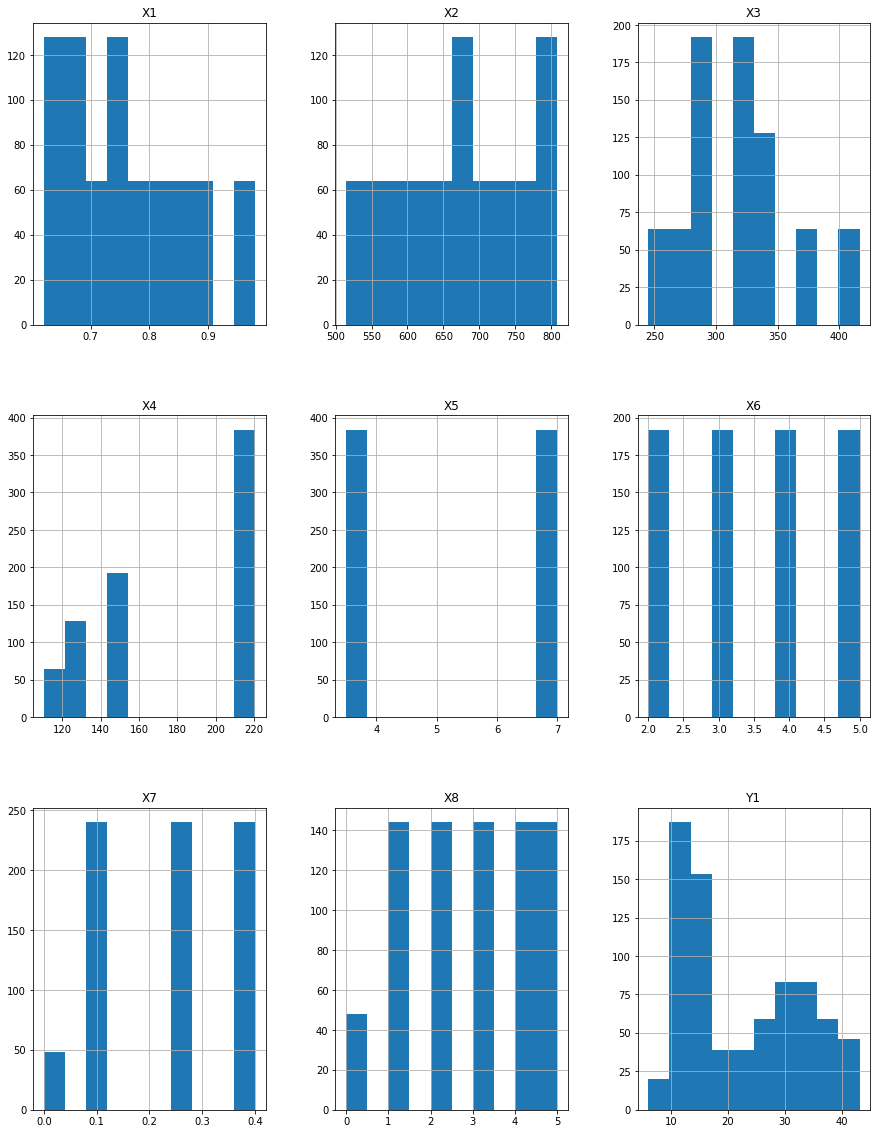

In [7]:
# Check basic distributions of all columns
energy_data.hist(figsize = (15,20))
plt.show()

In order to determine multicolinearity we also look at some heatmaps

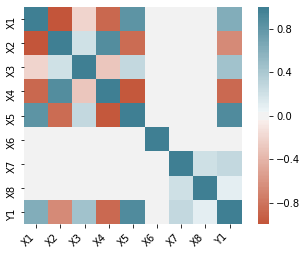

In [10]:
corr = energy_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

A better version of a heatmap is displayed below. The use of different sizes of legends makes reading this figure much easier

In [11]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)

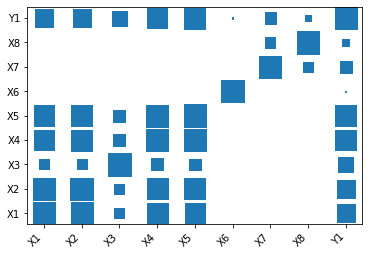

In [12]:
corr = energy_data.corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

 __REGRESSION__:
LABELS ARE CONTINUOUS VALUES.
Here the model is trained to predict a continuous value for each instance.
On inputting a feature vector into the model, the trained model is able to predict a continuous value  for  that instance.  

__Q 1.2: Train a linear regression model on 80 percent of the given dataset, what is the intercept value and coefficient values.__



In [13]:
from sklearn import linear_model 
from sklearn.model_selection import train_test_split

In [15]:
x = energy_data.iloc[:,0:8]
y = energy_data.iloc[:,8]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) 
print ('Number of samples in training data:',len(x_train)) 
print ('Number of samples in test data:',len(x_test)) 

Number of samples in training data: 614
Number of samples in test data: 154



#### Test/Train Error


In [18]:
lm = linear_model.LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y_predicted = lm.predict(x_train)

In [20]:
print('Coefficients:', lm.coef_) 
print('Intercept:', lm.intercept_)

Coefficients: [-6.51900583e+01 -1.11140774e+12  1.11140774e+12  2.22281549e+12
  4.14903777e+00 -8.32503489e-02  1.99476386e+01  1.63683125e-01]
Intercept: 84.72306188925081



####  **Plot error rates vs number of training examples.** 

Both the training error and the validation error should be plotted. 

In [22]:
# Train
rmse_train = (np.mean((y_predicted - y_train) ** 2))**0.5
print('Training RMSE Error:',rmse_train)

Training RMSE Error: 3.0114434495841835


In [23]:
# Test
Y_pred = lm.predict(x_test)

In [25]:
rmse_test = (np.mean((Y_pred - y_test) ** 2))**0.5
print('Test RMSE Error:',rmse_train)

Test RMSE Error: 3.0114434495841835


## Part 2 - Classification


__CLASSIFICATION__:
LABELS ARE DISCRETE VALUES.
Here the model is trained to classify each instance into a set of predefined  discrete classes.
On inputting a feature vector into the model, the trained model is able to predict a  class of that instance. You can also output the probabilities of an instance belnging to a class.  

Bucket values of 'y1' i.e 'Heating Load'  from the original dataset into 3 classes:__ 

0: 'Low' ( < 14),   
1: 'Medium'  (14-28),   
2: 'High'  (>28)

This converts the given dataset  into a classification problem, classes being, Heating load is: *low, medium or high*.

In [26]:
classes = pd.cut(energy_data['Y1'],bins = [energy_data['Y1'].min(), 14, 28, energy_data['Y1'].max()+1] ,labels =['Low', 'Medium','High'], right = False) 
energy_data['Classes'] = classes 
energy_data


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Classes
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,Medium
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,Medium
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,Medium
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,Medium
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,Medium
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,Medium
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,Medium
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,Medium
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,Medium
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,Medium


__ Q2.2: 
One of the preprocessing steps in Data science is Feature Scaling i.e getting all our data on the same scale by setting same  Min-Max of feature values. 
This makes training less sensitive to the scale of features . 
Scaling is important in algorithms that use distance based classification, SVM or K means or those that involve gradient descent optimization. If we  Scale features in the range [0,1] it is called unity based normalization.__

__Perform unity based normalization on the above dataset and train the model again, compare model performance in training and validation with your previous model.__  

refer:http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler  
more at: https://en.wikipedia.org/wiki/Feature_scaling

In [28]:
from sklearn.metrics import confusion_matrix
X = energy_data.iloc[:,0:8] 
Y = energy_data.iloc[:,9] 

In [29]:
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(X, Y, test_size = 0.2) 

In [30]:
print ('Number of samples in training data:',len(x_train_log)) 
print ('Number of samples in test data:',len(x_test_log)) 

Number of samples in training data: 614
Number of samples in test data: 154


In [33]:
logreg = linear_model.LogisticRegression()

#Train
logreg.fit(x_train_log, y_train_log) 
accuracy_train = logreg.score(x_train_log, y_train_log) 
print('Training Accuracy:', accuracy_train) 

Training Accuracy: 0.8094462540716613


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [34]:
# Test
accuracy_test = logreg.score(x_test_log, y_test_log)
print('Test Accuracy:',accuracy_test)

Test Accuracy: 0.7727272727272727


In [36]:
y_true = y_test_log 
y_pred = logreg.predict(x_test_log) 

In [37]:
ConfusionMatrix = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                               columns = ['Pred icted High','Predicted Low','Predicted Medium'], 
                               index = ['Actual High', 'Actual Low', 'Actual Medium']
                              ) 
print('') 
print(ConfusionMatrix) 


               Pred icted High  Predicted Low  Predicted Medium
Actual High                 48              0                 0
Actual Low                   0             47                 1
Actual Medium               24             10                24


In [38]:
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 

print('') 
print('Precision for 3 classes:', precision_score(y_true, y_pred, average=None)) 
print('Recall for 3 classes:', precision_score(y_true, y_pred, average=None)) 


Precision for 3 classes: [0.66666667 0.8245614  0.96      ]
Recall for 3 classes: [0.66666667 0.8245614  0.96      ]
